# SQLiteのテスト その1

軌道要素データをSQLiteのデータベースに格納するテスト。

軌道要素データは既に spacetracktest3-gp.ipynb でダウンロード済みであるものとする。

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import json
import os
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sqlite3
dbfile1 = 'db/dbtest1.sqlite3'

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 80)

In [3]:
# 既にダウンロード済みのデータを用いる (spacetracktest3-gp.ipynb でダウンロード)
norad_cat_id = 29479
file = 'download/gp_history_{}_all.json'.format(norad_cat_id)
df = pd.read_json(file, convert_dates = ['EPOCH', 'CREATION_DATE'])

In [4]:
df.head(3)

CCSDS_OMM_VERS                            COMMENT       CREATION_DATE  \
0               2  GENERATED VIA SPACE-TRACK.ORG API 2006-09-22 18:03:07   
1               2  GENERATED VIA SPACE-TRACK.ORG API 2006-09-22 20:05:18   
2               2  GENERATED VIA SPACE-TRACK.ORG API 2006-09-22 23:59:43   

  ORIGINATOR           OBJECT_NAME  OBJECT_ID CENTER_NAME REF_FRAME  \
0    18 SPCS  TBA - TO BE ASSIGNED  2006-041A       EARTH      TEME   
1    18 SPCS              OBJECT A  2006-041A       EARTH      TEME   
2    18 SPCS              OBJECT A  2006-041A       EARTH      TEME   

  TIME_SYSTEM MEAN_ELEMENT_THEORY                      EPOCH  MEAN_MOTION  \
0         UTC                SGP4 2006-09-22 22:35:39.747263    15.302105   
1         UTC                SGP4 2006-09-23 00:09:44.819999    15.315795   
2         UTC                SGP4 2006-09-23 04:52:24.892896    15.279977   

   ECCENTRICITY  INCLINATION  RA_OF_ASC_NODE  ARG_OF_PERICENTER  MEAN_ANOMALY  \
0      0.029731      98.3083        274.0769           131.1804      231.6053   
1      0.028316      98.3158        274.1513           130.1928      232.3173   
2      0.029644      98.3280        274.3622           129.3552      233.4332   

   EPHEMERIS_TYPE CLASSIFICATION_TYPE  NORAD_CAT_ID  ELEMENT_SET_NO  \
0               0                   U         29479             999   
1               0                   U         29479             999   
2               0                   U         29479             999   

   REV_AT_EPOCH     BSTAR  MEAN_MOTION_DOT  MEAN_MOTION_DDOT  SEMIMAJOR_AXIS  \
0             0  0.000000        -0.000007          0.000002        6853.324   
1             0  0.094972         0.092218          0.055074        6849.240   
2             4 -0.070448        -0.076811          0.009903        6859.940   

   PERIOD  APOAPSIS  PERIAPSIS OBJECT_TYPE RCS_SIZE COUNTRY_CODE LAUNCH_DATE  \
0  94.104   678.947    271.432         TBA     None         None        None   
1  94.020   665.049    277.161         TBA     None          JPN  2006-09-22   
2  94.240   685.161    278.448         TBA     None          JPN  2006-09-22   

   SITE  DECAY_DATE    FILE     GP_ID               TLE_LINE0  \
0  None         NaN  311559  58833614  0 TBA - TO BE ASSIGNED   
1  NULL         NaN  311562  58833618              0 OBJECT A   
2  NULL         NaN  311567  58833623              0 OBJECT A   

                                                               TLE_LINE1  \
0  1 29479U 06041A   06265.94143226 -.00000724  22906-5  00000+0 0  9999   
1  1 29479U 06041A   06266.00676875  .09221790  55074-1  94972-1 0  9995   
2  1 29479U 06041A   06266.20306589 -.07681137  99032-2 -70448-1 0  9999   

                                                               TLE_LINE2  
0  2 29479 098.3083 274.0769 0297312 131.1804 231.6053 15.30210541    03  
1  2 29479 098.3158 274.1513 0283162 130.1928 232.3173 15.31579544    01  
2  2 29479 098.3280 274.3622 0296440 129.3552 233.4332 15.27997695    45

In [5]:
# 重複するデータ
df[df.duplicated(subset=['EPOCH', 'MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY'])]

CCSDS_OMM_VERS                            COMMENT       CREATION_DATE  \
907                2  GENERATED VIA SPACE-TRACK.ORG API 2008-02-04 09:10:28   
2435               2  GENERATED VIA SPACE-TRACK.ORG API 2010-06-25 09:00:21   
2469               2  GENERATED VIA SPACE-TRACK.ORG API 2010-07-19 10:34:41   
2621               2  GENERATED VIA SPACE-TRACK.ORG API 2010-10-18 08:13:32   
2771               2  GENERATED VIA SPACE-TRACK.ORG API 2011-01-24 08:13:19   
2786               2  GENERATED VIA SPACE-TRACK.ORG API 2011-02-02 07:47:32   
2788               2  GENERATED VIA SPACE-TRACK.ORG API 2011-02-03 07:49:16   
2848               2  GENERATED VIA SPACE-TRACK.ORG API 2011-03-11 08:03:43   
2928               2  GENERATED VIA SPACE-TRACK.ORG API 2011-04-29 09:25:20   
3012               2  GENERATED VIA SPACE-TRACK.ORG API 2011-06-17 08:33:27   
3121               2  GENERATED VIA SPACE-TRACK.ORG API 2011-08-24 08:32:10   
3536               2  GENERATED VIA SPACE-TRACK.ORG API 2012-05-11 08:15:48   
5148               2  GENERATED VIA SPACE-TRACK.ORG API 2016-05-20 17:16:53   
5435               2  GENERATED VIA SPACE-TRACK.ORG API 2016-10-29 15:56:28   
5714               2  GENERATED VIA SPACE-TRACK.ORG API 2017-05-04 05:38:50   
5922               2  GENERATED VIA SPACE-TRACK.ORG API 2017-08-14 23:04:07   
5946               2  GENERATED VIA SPACE-TRACK.ORG API 2017-08-24 21:46:30   
6053               2  GENERATED VIA SPACE-TRACK.ORG API 2017-10-04 21:47:24   
6062               2  GENERATED VIA SPACE-TRACK.ORG API 2017-10-08 23:24:50   
6197               2  GENERATED VIA SPACE-TRACK.ORG API 2017-11-30 23:18:02   
6251               2  GENERATED VIA SPACE-TRACK.ORG API 2017-12-20 16:52:02   
6308               2  GENERATED VIA SPACE-TRACK.ORG API 2018-01-11 22:59:30   
6322               2  GENERATED VIA SPACE-TRACK.ORG API 2018-01-19 00:00:50   
6331               2  GENERATED VIA SPACE-TRACK.ORG API 2018-01-22 16:40:03   
6340               2  GENERATED VIA SPACE-TRACK.ORG API 2018-01-26 00:09:01   
6357               2  GENERATED VIA SPACE-TRACK.ORG API 2018-02-01 22:45:57   
6403               2  GENERATED VIA SPACE-TRACK.ORG API 2018-02-22 07:57:47   
6504               2  GENERATED VIA SPACE-TRACK.ORG API 2018-04-05 21:40:07   
6521               2  GENERATED VIA SPACE-TRACK.ORG API 2018-04-12 21:30:17   
6524               2  GENERATED VIA SPACE-TRACK.ORG API 2018-04-13 23:14:22   
6554               2  GENERATED VIA SPACE-TRACK.ORG API 2018-04-24 23:19:53   
6615               2  GENERATED VIA SPACE-TRACK.ORG API 2018-05-17 21:41:47   
6642               2  GENERATED VIA SPACE-TRACK.ORG API 2018-05-27 23:14:57   
6741               2  GENERATED VIA SPACE-TRACK.ORG API 2018-07-05 21:38:36   
6869               2  GENERATED VIA SPACE-TRACK.ORG API 2018-09-06 23:29:09   
6900               2  GENERATED VIA SPACE-TRACK.ORG API 2018-09-19 23:45:47   
6935               2  GENERATED VIA SPACE-TRACK.ORG API 2018-10-08 06:06:21   
6960               2  GENERATED VIA SPACE-TRACK.ORG API 2018-10-19 22:46:19   
6987               2  GENERATED VIA SPACE-TRACK.ORG API 2018-10-30 22:36:18   
7020               2  GENERATED VIA SPACE-TRACK.ORG API 2018-11-16 18:44:56   
7247               2  GENERATED VIA SPACE-TRACK.ORG API 2019-03-10 05:00:50   
7285               2  GENERATED VIA SPACE-TRACK.ORG API 2019-03-29 04:24:33   
7530               2  GENERATED VIA SPACE-TRACK.ORG API 2019-08-13 17:52:57   
7801               2  GENERATED VIA SPACE-TRACK.ORG API 2020-01-20 22:30:19   
7835               2  GENERATED VIA SPACE-TRACK.ORG API 2020-02-06 20:50:23   
7908               2  GENERATED VIA SPACE-TRACK.ORG API 2020-03-09 22:46:17   
8068               2  GENERATED VIA SPACE-TRACK.ORG API 2020-05-23 22:46:09   
8078               2  GENERATED VIA SPACE-TRACK.ORG API 2020-05-31 22:36:09   
8104               2  GENERATED VIA SPACE-TRACK.ORG API 2020-06-11 22:14:26   

     ORIGINATOR       OBJECT_NAME  OBJECT_ID CENTER_NAM

In [6]:
df[906:908]

CCSDS_OMM_VERS                            COMMENT       CREATION_DATE  \
906               2  GENERATED VIA SPACE-TRACK.ORG API 2008-02-03 18:28:18   
907               2  GENERATED VIA SPACE-TRACK.ORG API 2008-02-04 09:10:28   

    ORIGINATOR       OBJECT_NAME  OBJECT_ID CENTER_NAME REF_FRAME TIME_SYSTEM  \
906    18 SPCS  HINODE (SOLAR B)  2006-041A       EARTH      TEME         UTC   
907    18 SPCS  HINODE (SOLAR B)  2006-041A       EARTH      TEME         UTC   

    MEAN_ELEMENT_THEORY                      EPOCH  MEAN_MOTION  ECCENTRICITY  \
906                SGP4 2008-02-03 22:38:31.801631    14.628066      0.001566   
907                SGP4 2008-02-03 22:38:31.801631    14.628066      0.001566   

     INCLINATION  RA_OF_ASC_NODE  ARG_OF_PERICENTER  MEAN_ANOMALY  \
906      98.0807         43.7624           161.6091      198.5681   
907      98.0807         43.7624           161.6091      198.5681   

     EPHEMERIS_TYPE CLASSIFICATION_TYPE  NORAD_CAT_ID  ELEMENT_SET_NO  \
906               0                   U         29479             999   
907               0                   U         29479             999   

     REV_AT_EPOCH     BSTAR  MEAN_MOTION_DOT  MEAN_MOTION_DDOT  \
906          7299  0.000035         0.000001               0.0   
907          7299  0.000035         0.000001               0.0   

     SEMIMAJOR_AXIS  PERIOD  APOAPSIS  PERIAPSIS OBJECT_TYPE RCS_SIZE  \
906        7062.267   98.44   695.191    673.073     PAYLOAD    LARGE   
907        7062.267   98.44   695.191    673.073     PAYLOAD    LARGE   

    COUNTRY_CODE LAUNCH_DATE   SITE  DECAY_DATE    FILE     GP_ID  \
906          JPN  2006-09-22  KSCUT         NaN  507763  64948734   
907          JPN  2006-09-22  KSCUT         NaN  508105  64959489   

              TLE_LINE0  \
906  0 HINODE (SOLAR B)   
907  0 HINODE (SOLAR B)   

                                                                 TLE_LINE1  \
906  1 29479U 06041A   08034.94342363  .00000130  00000-0  34536-4 0  9990   
907  1 29479U 06041A   08034.94342363 +.00000130 +00000-0 +34536-4 0  9990   

                                                                 TLE_LINE2  
906  2 29479 098.0807 043.7624 0015659 161.6091 198.5681 14.62806581 72997  
907  2 29479 098.0807 043.7624 0015659 161.6091 198.5681 14.62806581072997

In [7]:
# DBを作成
conn = sqlite3.connect(dbfile1)
c = conn.cursor()

In [8]:
#c.execute('''CREATE TABLE IF NOT EXISTS elset (
#    CREATION_DATE timestamp, EPOCH timestamp, OBJECT_ID text,
#    MEAN_MOTION real, ECCENTRICITY real, INCLINATION real, RA_OF_ASC_NODE real, ARG_OF_PERICENTER real, MEAN_ANOMALY real,
#    NORAD_CAT_ID integer, REV_AT_EPOCH integer, BSTAR real, SEMIMAJOR_AXIS real, PERIOD real, APOAPSIS real, PERIAPSIS real)''')

In [9]:
df_out = df[['CREATION_DATE', 'EPOCH', 'OBJECT_ID', 'MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE',
    'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'NORAD_CAT_ID', 'REV_AT_EPOCH', 'BSTAR', 'SEMIMAJOR_AXIS',
    'PERIOD', 'APOAPSIS', 'PERIAPSIS']]

In [10]:
df_out.to_sql('elset', conn, if_exists='replace', index=None)

In [11]:
# Index作成
c.execute('''CREATE INDEX IF NOT EXISTS elset_index ON elset (CREATION_DATE, EPOCH)''')

In [12]:
conn.commit()

In [13]:
conn.close()

In [14]:
with sqlite3.connect(dbfile1) as conn:
    c = conn.cursor()
    c.execute("select * from sqlite_master where type='table' and name='elset'")
    print(c.fetchone())

('table', 'elset', 'elset', 2, 'CREATE TABLE "elset" (\n"CREATION_DATE" TIMESTAMP,\n  "EPOCH" TIMESTAMP,\n  "OBJECT_ID" TEXT,\n  "MEAN_MOTION" REAL,\n  "ECCENTRICITY" REAL,\n  "INCLINATION" REAL,\n  "RA_OF_ASC_NODE" REAL,\n  "ARG_OF_PERICENTER" REAL,\n  "MEAN_ANOMALY" REAL,\n  "NORAD_CAT_ID" INTEGER,\n  "REV_AT_EPOCH" INTEGER,\n  "BSTAR" REAL,\n  "SEMIMAJOR_AXIS" REAL,\n  "PERIOD" REAL,\n  "APOAPSIS" REAL,\n  "PERIAPSIS" REAL\n)')


In [15]:
# DBから読み込み
with sqlite3.connect(dbfile1) as conn:
    df_in = pd.read_sql_query("SELECT * FROM elset", conn, parse_dates = ['CREATION_DATE', 'EPOCH'])
df_in.head()

CREATION_DATE                      EPOCH  OBJECT_ID  MEAN_MOTION  \
0 2006-09-22 18:03:07 2006-09-22 22:35:39.747263  2006-041A    15.302105   
1 2006-09-22 20:05:18 2006-09-23 00:09:44.819999  2006-041A    15.315795   
2 2006-09-22 23:59:43 2006-09-23 04:52:24.892896  2006-041A    15.279977   
3 2006-09-23 01:22:45 2006-09-23 04:52:24.932639  2006-041A    15.280796   
4 2006-09-23 04:57:19 2006-09-23 09:35:01.257504  2006-041A    15.297827   

   ECCENTRICITY  INCLINATION  RA_OF_ASC_NODE  ARG_OF_PERICENTER  MEAN_ANOMALY  \
0      0.029731      98.3083        274.0769           131.1804      231.6053   
1      0.028316      98.3158        274.1513           130.1928      232.3173   
2      0.029644      98.3280        274.3622           129.3552      233.4332   
3      0.029644      98.3280        274.3622           129.3552      233.4314   
4      0.028664      98.3271        274.6004           128.2523      234.4722   

   NORAD_CAT_ID  REV_AT_EPOCH     BSTAR  SEMIMAJOR_AXIS  PERIOD  APOAPSIS  \
0         29479             0  0.000000        6853.324  94.104   678.947   
1         29479             0  0.094972        6849.240  94.020   665.049   
2         29479             4 -0.070448        6859.940  94.240   685.161   
3         29479             4 -0.066173        6859.694  94.235   684.908   
4         29479             7  0.000441        6854.602  94.131   672.951   

   PERIAPSIS  
0    271.432  
1    277.161  
2    278.448  
3    278.211  
4    279.983

In [16]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8462 entries, 0 to 8461
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CREATION_DATE      8462 non-null   datetime64[ns]
 1   EPOCH              8462 non-null   datetime64[ns]
 2   OBJECT_ID          8462 non-null   object        
 3   MEAN_MOTION        8462 non-null   float64       
 4   ECCENTRICITY       8462 non-null   float64       
 5   INCLINATION        8462 non-null   float64       
 6   RA_OF_ASC_NODE     8462 non-null   float64       
 7   ARG_OF_PERICENTER  8462 non-null   float64       
 8   MEAN_ANOMALY       8462 non-null   float64       
 9   NORAD_CAT_ID       8462 non-null   int64         
 10  REV_AT_EPOCH       8462 non-null   int64         
 11  BSTAR              8462 non-null   float64       
 12  SEMIMAJOR_AXIS     8462 non-null   float64       
 13  PERIOD             8462 non-null   float64       
 14  APOAPSIS

In [17]:
# EPOCHはマイクロ秒まで保存しているので、datetime関数を使えない
with sqlite3.connect(dbfile1) as conn:
    df_in = pd.read_sql_query("SELECT * FROM elset WHERE EPOCH BETWEEN '2010-01-01 00:00:00.000000' AND '2010-01-03 00:00:00.000000'", 
                              conn, parse_dates = ['CREATION_DATE', 'EPOCH'])
df_in.head()

CREATION_DATE                      EPOCH  OBJECT_ID  MEAN_MOTION  \
0 2010-01-02 12:48:57 2010-01-01 19:43:21.791999  2006-041A    14.629422   
1 2010-01-02 00:05:49 2010-01-02 02:17:19.576607  2006-041A    14.629423   
2 2010-01-03 13:01:52 2010-01-02 18:42:13.940927  2006-041A    14.629422   

   ECCENTRICITY  INCLINATION  RA_OF_ASC_NODE  ARG_OF_PERICENTER  MEAN_ANOMALY  \
0      0.001632      98.0864          7.4417           129.7220      230.5408   
1      0.001634      98.0865          7.7098           128.9909      231.2759   
2      0.001636      98.0865          8.3800           126.8581      233.4112   

   NORAD_CAT_ID  REV_AT_EPOCH     BSTAR  SEMIMAJOR_AXIS  PERIOD  APOAPSIS  \
0         29479         17502  0.000011        7061.831  98.431   695.220   
1         29479         17506  0.000011        7061.831  98.431   695.236   
2         29479         17516  0.000007        7061.831  98.431   695.246   

   PERIAPSIS  
0    672.172  
1    672.155  
2    672.145

In [18]:
# 3日以内に作成されたデータ
with sqlite3.connect(dbfile1) as conn:
    df_in = pd.read_sql_query("SELECT * FROM elset WHERE CREATION_DATE > datetime('now', '-3 days')",
                              conn, parse_dates = ['CREATION_DATE', 'EPOCH'])
df_in

CREATION_DATE                      EPOCH  OBJECT_ID  MEAN_MOTION  \
0 2020-11-05 20:38:03 2020-11-05 12:34:00.008544  2006-041A    14.650961   
1 2020-11-05 21:46:10 2020-11-05 19:07:22.978272  2006-041A    14.650961   
2 2020-11-06 18:35:33 2020-11-06 13:09:11.138976  2006-041A    14.650964   
3 2020-11-07 02:25:42 2020-11-06 21:20:54.848544  2006-041A    14.650965   
4 2020-11-07 06:46:10 2020-11-07 00:37:36.331680  2006-041A    14.650965   
5 2020-11-07 17:57:51 2020-11-07 07:10:59.297952  2006-041A    14.650965   
6 2020-11-08 05:03:59 2020-11-07 18:39:24.489792  2006-041A    14.650966   

   ECCENTRICITY  INCLINATION  RA_OF_ASC_NODE  ARG_OF_PERICENTER  MEAN_ANOMALY  \
0      0.001587      98.1576        321.2041           285.9858       73.9596   
1      0.001587      98.1575        321.4750           285.0499       74.8949   
2      0.001586      98.1575        322.2202           282.5035       77.4394   
3      0.001585      98.1575        322.5589           281.3354       78.6067   
4      0.001585      98.1575        322.6944           280.8712       79.0707   
5      0.001584      98.1575        322.9654           279.9366       80.0048   
6      0.001584      98.1575        323.4396           278.2931       81.6477   

   NORAD_CAT_ID  REV_AT_EPOCH     BSTAR  SEMIMAJOR_AXIS  PERIOD  APOAPSIS  \
0         29479         75454  0.000022        7054.903  98.287   687.965   
1         29479         75459  0.000022        7054.903  98.287   687.962   
2         29479         75469  0.000025        7054.902  98.287   687.955   
3         29479         75474  0.000026        7054.902  98.287   687.951   
4         29479         75477  0.000026        7054.902  98.287   687.951   
5         29479         75480  0.000024        7054.902  98.287   687.945   
6         29479         75487  0.000025        7054.902  98.287   687.938   

   PERIAPSIS  
0    665.572  
1    665.575  
2    665.580  
3    665.584  
4    665.583  
5    665.589  
6    665.595

In [19]:
# 日付ごとのEPOCHの件数
with sqlite3.connect(dbfile1) as conn:
    df_in = pd.read_sql_query("SELECT date(EPOCH) AS EPOCH, COUNT(*) AS COUNT FROM elset GROUP BY EPOCH",
                              conn, parse_dates = ['CREATION_DATE', 'EPOCH'])
df_in

EPOCH  COUNT
0    2006-09-22      1
1    2006-09-23      9
2    2006-09-24     11
3    2006-09-25      4
4    2006-09-26      2
...         ...    ...
4936 2020-11-03      1
4937 2020-11-04      3
4938 2020-11-05      2
4939 2020-11-06      2
4940 2020-11-07      3

[4941 rows x 2 columns]

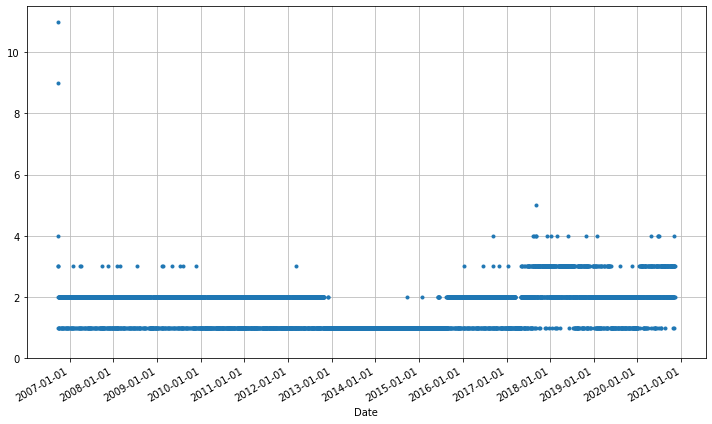

In [20]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(df_in['EPOCH'], df_in['COUNT'], '.')
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, bymonth=1, tz=None))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax1.set_xlabel("Date")
ax1.grid(b=True, which='major', color='#bbbbbb', linestyle='-')
ax1.set_ylim(bottom=0)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()